In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import imblearn
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [9]:

train_data = pd.read_csv('data/train.csv')

Renaming Columns

In [10]:
# Remove quotes and replace spaces with underscores
train_data.columns = [col.strip().replace("'", '').replace(' ', '_') for col in train_data.columns]



In [12]:
train_data = train_data.rename(columns={
    'Genes_in_mothers_side': 'Genes_Mothers_Side',
    'Inherited_from_father': 'Inherited_Father',
    'Blood_cell_count_(mcL)': 'Blood_Cell_mcL',
    'Respiratory_Rate_(breaths/min)': 'Respiratory_Rate_breaths_min',
    'Heart_Rate_(rates/min': 'Heart_Rates_Min',
    'Follow-up': 'Follow_up',
    'Autopsy_shows_birth_defect_(if_applicable)': 'Autopsy_Birth_Defect',
    'Folic_acid_details_(peri-conceptional)': 'Folic_Acid',
    'H/O_serious_maternal_illness': 'Maternal_Illness',
    'H/O_radiation_exposure_(x-ray)': 'Radiation_Exposure',
    'H/O_substance_abuse': 'Substance_Abuse',
    'Assisted_conception_IVF/ART': 'Assisted_Conception',
    'History_of_anomalies_in_previous_pregnancies': 'History_Previous_Pregnancies',
    'No._of_previous_abortion': 'Previous_Abortion',
    'Birth_defects': 'Birth_Defects',
    'White_Blood_cell_count_(thousand_per_microliter)': 'White_Blood_Cell',
})

In [13]:
train_data.columns

Index(['Patient_Id', 'Patient_Age', 'Genes_Mothers_Side', 'Inherited_Father',
       'Maternal_gene', 'Paternal_gene', 'Blood_Cell_mcL',
       'Patient_First_Name', 'Family_Name', 'Fathers_name', 'Mothers_age',
       'Fathers_age', 'Institute_Name', 'Location_of_Institute', 'Status',
       'Respiratory_Rate_breaths_min', 'Heart_Rates_Min', 'Test_1', 'Test_2',
       'Test_3', 'Test_4', 'Test_5', 'Parental_consent', 'Follow_up', 'Gender',
       'Birth_asphyxia', 'Autopsy_Birth_Defect', 'Place_of_birth',
       'Folic_Acid', 'Maternal_Illness', 'Radiation_Exposure',
       'Substance_Abuse', 'Assisted_Conception',
       'History_Previous_Pregnancies', 'Previous_Abortion', 'Birth_Defects',
       'White_Blood_Cell', 'Blood_test_result', 'Symptom_1', 'Symptom_2',
       'Symptom_3', 'Symptom_4', 'Symptom_5', 'Genetic_Disorder',
       'Disorder_Subclass'],
      dtype='object')

If Genetic_Disorder is NaN, removing those rows

In [14]:
# Drop rows where 'Genetic_Disorder' is NaN
train_data.dropna(subset=['Genetic_Disorder'], inplace=True)

# Reset the index to update row numbers and avoid keeping the old index
train_data.reset_index(drop=True, inplace=True)

Dropping the unnecessary data columns - Based on Optimised Paper

In [15]:
train_data

,Patient_Id,Patient_Age,Genes_Mothers_Side,Inherited_Father,Maternal_gene,Paternal_gene,Blood_Cell_mcL,Patient_First_Name,Family_Name,Fathers_name,...,Birth_Defects,White_Blood_Cell,Blood_test_result,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Genetic_Disorder,Disorder_Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
2,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
3,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
4,PID0x44fe,14.0,Yes,No,Yes,No,5.103188,Richard,NaN,Coleston,...,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,PID0x3656,9.0,No,Yes,Yes,Yes,5.012599,Edward,Hurst,Quientin,...,NaN,12.000000,slightly abnormal,NaN,1.0,0.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
19933,PID0x5598,4.0,Yes,Yes,Yes,No,5.258298,Lynn,NaN,Alhassane,...,Multiple,6.584811,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
19934,PID0x19cb,8.0,No,Yes,No,Yes,4.974220,Matthew,Farley,Dartanion,...,Multiple,7.041556,inconclusive,1.0,1.0,1.0,1.0,0.0,Multifactorial genetic inheritance disorders,Diabetes
19935,PID0x3c4f,8.0,Yes,No,Yes,No,5.186470,John,NaN,Cavani,...,Singular,7.715464,normal,0.0,0.0,0.0,1.0,NaN,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy


In [16]:
train_data = train_data.drop(columns=['Patient_Id','Patient_First_Name', 'Family_Name',
       'Fathers_name','Institute_Name', 'Place_of_birth',
       'Location_of_Institute'])
#'Test_1', 'Test_2', 'Test_3', 'Test_4',
 #      'Test_5', 
  #     'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5'])

In [17]:
train_data.duplicated().sum()

0

In [19]:
train_data.columns

Index(['Patient_Age', 'Genes_Mothers_Side', 'Inherited_Father',
       'Maternal_gene', 'Paternal_gene', 'Blood_Cell_mcL', 'Mothers_age',
       'Fathers_age', 'Status', 'Respiratory_Rate_breaths_min',
       'Heart_Rates_Min', 'Test_1', 'Test_2', 'Test_3', 'Test_4', 'Test_5',
       'Parental_consent', 'Follow_up', 'Gender', 'Birth_asphyxia',
       'Autopsy_Birth_Defect', 'Folic_Acid', 'Maternal_Illness',
       'Radiation_Exposure', 'Substance_Abuse', 'Assisted_Conception',
       'History_Previous_Pregnancies', 'Previous_Abortion', 'Birth_Defects',
       'White_Blood_Cell', 'Blood_test_result', 'Symptom_1', 'Symptom_2',
       'Symptom_3', 'Symptom_4', 'Symptom_5', 'Genetic_Disorder',
       'Disorder_Subclass'],
      dtype='object')

In [20]:
print(train_data["Genes_Mothers_Side"].value_counts())

Genes_Mothers_Side
Yes    11848
No      8089
Name: count, dtype: int64


In [21]:
print(train_data['Genetic_Disorder'].value_counts())

Genetic_Disorder
Mitochondrial genetic inheritance disorders     10202
Single-gene inheritance diseases                 7664
Multifactorial genetic inheritance disorders     2071
Name: count, dtype: int64


In [22]:
def get_unique(train_data):
    for i in train_data.columns:
        print(f'{i} - > {len(train_data[i].unique())}')
get_unique(train_data)

Patient_Age - > 16
Genes_Mothers_Side - > 2
Inherited_Father - > 3
Maternal_gene - > 3
Paternal_gene - > 2
Blood_Cell_mcL - > 19937
Mothers_age - > 35
Fathers_age - > 46
Status - > 2
Respiratory_Rate_breaths_min - > 3
Heart_Rates_Min - > 3
Test_1 - > 2
Test_2 - > 2
Test_3 - > 2
Test_4 - > 2
Test_5 - > 2
Parental_consent - > 2
Follow_up - > 3
Gender - > 4
Birth_asphyxia - > 5
Autopsy_Birth_Defect - > 4
Folic_Acid - > 3
Maternal_Illness - > 3
Radiation_Exposure - > 5
Substance_Abuse - > 5
Assisted_Conception - > 3
History_Previous_Pregnancies - > 3
Previous_Abortion - > 6
Birth_Defects - > 3
White_Blood_Cell - > 15682
Blood_test_result - > 5
Symptom_1 - > 3
Symptom_2 - > 3
Symptom_3 - > 3
Symptom_4 - > 3
Symptom_5 - > 3
Genetic_Disorder - > 3
Disorder_Subclass - > 10


In [ ]:
# Continuous features with median imputation
train_data['Patient_Age'].fillna(train_data['Patient_Age'].median(), inplace=True)
train_data['Blood_Cell_mcL'].fillna(train_data['Blood_Cell_mcL'].median(), inplace=True)
train_data['White_Blood_Cell'].fillna(train_data['White_Blood_Cell'].median(), inplace=True)

# Categorical/ordinal features with mode imputation
columns_to_fill_mode = [
    'Genes_Mothers_Side', 'Inherited_Father', 'Maternal_gene', 'Paternal_gene','Mothers_age',
    'Fathers_age','Status', 'Respiratory_Rate_breaths_min', 'Heart_Rates_Min','Test_1','Test_2','Test_3','Test_4','Test_5' 
    'Parental_consent', 'Follow_up', 'Gender', 'Birth_asphyxia','Autopsy_Birth_Defect',  
    'Folic_Acid', 
    'Maternal_Illness', 'Radiation_Exposure', 
    'Substance_Abuse', 'Assisted_Conception', 
    'History_Previous_Pregnancies','Previous_Abortion', 'Birth_Defects', 
    'Blood_test_result','Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Disorder_Subclass'
]

for col in columns_to_fill_mode:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)



In [27]:
train_data.isnull().sum()

Patient_Age                        0
Genes_Mothers_Side                 0
Inherited_Father                   0
Maternal_gene                      0
Paternal_gene                      0
Blood_Cell_mcL                     0
Mothers_age                        0
Fathers_age                        0
Status                             0
Respiratory_Rate_breaths_min       0
Heart_Rates_Min                    0
Test_1                          1818
Test_2                          1844
Test_3                          1822
Test_4                          1848
Test_5                          1876
Parental_consent                   0
Follow_up                          0
Gender                             0
Birth_asphyxia                     0
Autopsy_Birth_Defect               0
Folic_Acid                         0
Maternal_Illness                   0
Radiation_Exposure                 0
Substance_Abuse                    0
Assisted_Conception                0
History_Previous_Pregnancies       0
P

In [78]:
print("Status: ",train_data["Status"].unique())
print("Respiratory Rate (breaths/min): ",train_data["Respiratory_Rate_breaths_min"].unique())
print("Heart Rate: ",train_data["Heart_Rates_Min"].unique())
print("Follow-up: ",train_data["Follow_up"].unique())
print("Gender: ",train_data["Gender"].unique())
print("Autopsy shows birth defect: ",train_data["Autopsy_Birth_Defect"].unique())
print("Birth defects: ",train_data["Birth_Defects"].unique())
print("Blood test result: ",train_data["Blood_test_result"].unique())
print("Genetic Disorder: ",train_data["Genetic_Disorder"].unique())
print("Disorder Subclass: ",train_data["Disorder_Subclass"].unique())
print("Symptom_1: ",train_data["Symptom_1"].unique())

Status:  ['Alive' 'Deceased']
Respiratory Rate (breaths/min):  ['Normal (30-60)' 'Tachypnea']
Heart Rate:  ['Normal' 'Tachycardia']
Follow-up:  ['High' 'Low']
Gender:  ['Ambiguous' 'Male' 'Female']
Autopsy shows birth defect:  ['Not applicable' 'No' 'Yes']
Birth defects:  ['Multiple' 'Singular']
Blood test result:  ['slightly abnormal' 'normal' 'inconclusive' 'abnormal']
Genetic Disorder:  ['Mitochondrial genetic inheritance disorders'
 'Multifactorial genetic inheritance disorders'
 'Single-gene inheritance diseases']
Disorder Subclass:  ["Leber's hereditary optic neuropathy" 'Diabetes' 'Leigh syndrome'
 'Cancer' 'Cystic fibrosis' 'Tay-Sachs' 'Hemochromatosis'
 'Mitochondrial myopathy' "Alzheimer's"]
Symptom_1:  [ 1.  0. nan]


In [79]:
""" # Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape)-1)))

# Create a Cramér's V correlation matrix
def cramers_v_matrix(data):
    cols = data.columns
    correlation_matrix = pd.DataFrame(index=cols, columns=cols)

    for i in range(len(cols)):
        for j in range(len(cols)):
            correlation_matrix.iloc[i, j] = cramers_v(data[cols[i]], data[cols[j]])

    return correlation_matrix.astype(float)

# Assuming train_data is your DataFrame with all categorical values
cramers_v_corr = cramers_v_matrix(train_data)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cramers_v_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Cramér's V Correlation Heatmap")
plt.show() """

' # Function to calculate Cramér\'s V\ndef cramers_v(x, y):\n    confusion_matrix = pd.crosstab(x, y)\n    chi2 = chi2_contingency(confusion_matrix)[0]\n    n = confusion_matrix.sum().sum()\n    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape)-1)))\n\n# Create a Cramér\'s V correlation matrix\ndef cramers_v_matrix(data):\n    cols = data.columns\n    correlation_matrix = pd.DataFrame(index=cols, columns=cols)\n\n    for i in range(len(cols)):\n        for j in range(len(cols)):\n            correlation_matrix.iloc[i, j] = cramers_v(data[cols[i]], data[cols[j]])\n\n    return correlation_matrix.astype(float)\n\n# Assuming train_data is your DataFrame with all categorical values\ncramers_v_corr = cramers_v_matrix(train_data)\n\n# Create a heatmap\nplt.figure(figsize=(12, 8))\nsns.heatmap(cramers_v_corr, annot=True, fmt=".2f", cmap=\'coolwarm\', square=True, cbar_kws={"shrink": .8})\nplt.title("Cramér\'s V Correlation Heatmap")\nplt.show() '

Encoding

In [89]:
encode_train_data = train_data.copy()

In [90]:
encode_train_data.columns

Index(['Patient_Age', 'Genes_Mothers_Side', 'Inherited_Father',
       'Maternal_gene', 'Paternal_gene', 'Blood_Cell_mcL', 'Mothers_age',
       'Fathers_age', 'Status', 'Respiratory_Rate_breaths_min',
       'Heart_Rates_Min', 'Test_1', 'Test_2', 'Test_3', 'Test_4', 'Test_5',
       'Parental_consent', 'Follow_up', 'Gender', 'Birth_asphyxia',
       'Autopsy_Birth_Defect', 'Folic_Acid', 'Maternal_Illness',
       'Radiation_Exposure', 'Substance_Abuse', 'Assisted_Conception',
       'History_Previous_Pregnancies', 'Previous_Abortion', 'Birth_Defects',
       'White_Blood_Cell', 'Blood_test_result', 'Symptom_1', 'Symptom_2',
       'Symptom_3', 'Symptom_4', 'Symptom_5', 'Genetic_Disorder',
       'Disorder_Subclass'],
      dtype='object')

In [91]:
# Columns to encode
columns_to_encode = [
    "Genes_Mothers_Side", "Inherited_Father", "Maternal_gene", "Paternal_gene", "Status",
    "Respiratory_Rate_breaths_min", "Heart_Rates_Min","Test_1", "Test_2", "Test_3", "Test_4", "Test_5", "Parental_consent", "Follow_up",
    "Gender", "Birth_asphyxia", "Autopsy_Birth_Defect", "Folic_Acid", "Maternal_Illness",
    "Radiation_Exposure", "Substance_Abuse", "Assisted_Conception", 
    "History_Previous_Pregnancies", "Birth_Defects", "Blood_test_result", "Symptom_1", "Symptom_2",
       "Symptom_3", "Symptom_4", "Symptom_5",
    "Genetic_Disorder", "Disorder_Subclass"
]

# Dictionary to store mappings for each column
encoding_mappings = {}

# Loop through each column and encode using pd.factorize()
for col in columns_to_encode:
    # Encode the column and get the unique values
    encode_train_data[col], unique_values = pd.factorize(encode_train_data[col])
    
    # Store the mapping of encoded values to original values
    encoding_mappings[col] = {index: value for index, value in enumerate(unique_values)}

# Print each column's encoding mappings one below the other
for col, mapping in encoding_mappings.items():
    print(f"Encoding mapping for '{col}':")
    for encoded_value, original_value in mapping.items():
        print(f"  {encoded_value}: {original_value}")
    print("\n")  # Blank line between columns for readability


Encoding mapping for 'Genes_Mothers_Side':
  0: Yes
  1: No


Encoding mapping for 'Inherited_Father':
  0: No
  1: Yes


Encoding mapping for 'Maternal_gene':
  0: Yes
  1: No


Encoding mapping for 'Paternal_gene':
  0: No
  1: Yes


Encoding mapping for 'Status':
  0: Alive
  1: Deceased


Encoding mapping for 'Respiratory_Rate_breaths_min':
  0: Normal (30-60)
  1: Tachypnea


Encoding mapping for 'Heart_Rates_Min':
  0: Normal
  1: Tachycardia


Encoding mapping for 'Test_1':
  0: 0.0


Encoding mapping for 'Test_2':
  0: 0.0


Encoding mapping for 'Test_3':
  0: 0.0


Encoding mapping for 'Test_4':
  0: 1.0


Encoding mapping for 'Test_5':
  0: 0.0


Encoding mapping for 'Parental_consent':
  0: Yes


Encoding mapping for 'Follow_up':
  0: High
  1: Low


Encoding mapping for 'Gender':
  0: Ambiguous
  1: Male
  2: Female


Encoding mapping for 'Birth_asphyxia':
  0: Yes
  1: No record
  2: Not available
  3: No


Encoding mapping for 'Autopsy_Birth_Defect':
  0: Not applicable
 

In [ ]:
encode_train_data

In [ ]:
#encode_train_data = encode_train_data.astype("float32")
encode_train_data

Model implementation before balancing

In [ ]:
# Import necessary libraries
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
# Assuming 'Genetic Disorder' is the target column with the specified classes
X = encode_train_data.drop(['Genetic_Disorder','Disorder_subclass'], axis=1)  # Drop the target column from features
y = encode_train_data['Genetic_Disorder']  # Set target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

2009     0
7703     0
5923     2
19278    2
3950     1
        ..
11284    0
11964    0
5390     2
860      0
15795    2
Name: Genetic_Disorder, Length: 15949, dtype: int64

In [103]:
# Define a mapping dictionary
disorder_mapping = {
    0: 'Mitochondrial genetic inheritance disorders',
    1: 'Multifactorial genetic inheritance disorders',
    2: 'Single-gene inheritance diseases'
}

# Map the numeric values to disorder names in y_train
#y_train = y_train.map(disorder_mapping)


In [ ]:

# Define base classifiers
base_classifiers = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
    ('svc', SVC(probability=True, random_state=42))
]

# Define the meta-classifier
meta_classifier = LogisticRegression()

# Create the stacking classifier
stacking_classifier = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=meta_classifier,
    cv=5
)

# Train the stacking classifier
stacking_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = stacking_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=disorder_mapping.values()))

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# Perform Chi-Square test
chi2_scores, p_values = chi2(X, y)

# Create a DataFrame for feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_scores,
    'p-value': p_values
}).sort_values(by='Chi2 Score', ascending=False)

print(feature_scores)


Applying SMOTE for balancing

In [ ]:
# Assuming 'Genetic Disorder' is the target column with the specified classes
X = encode_train_data.drop(['Genetic_Disorder'], axis=1)  # Drop the target column from features
y = encode_train_data['Genetic_Disorder']  # Set target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for multiclass targets
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Display the class distribution after applying SMOTE
print("Class distribution before SMOTE:\n", y_train.value_counts())
print("Class distribution after SMOTE:\n", y_train_res.value_counts())


Class distribution before SMOTE:
 Genetic_Disorder
0    10202
2     7664
1     2071
Name: count, dtype: int64
Class distribution after SMOTE:
 Genetic_Disorder
0    10202
1    10202
2    10202
Name: count, dtype: int64


 0: Mitochondrial genetic inheritance disorders
  1: Multifactorial genetic inheritance disorders
  2: Single-gene inheritance diseases

In [ ]:

# Convert the SMOTE-resampled target data back into a DataFrame for plotting
y_train_res_df = pd.DataFrame(y_train_res, columns=['Genetic_Disorder'])

In [ ]:
# Define a mapping dictionary
disorder_mapping = {
    0: 'Mitochondrial genetic inheritance disorders',
    1: 'Multifactorial genetic inheritance disorders',
    2: 'Single-gene inheritance diseases'
}

# Map the numeric values to disorder names
y_train_res_df['Genetic_Disorder'] = y_train_res_df['Genetic_Disorder'].replace(disorder_mapping)


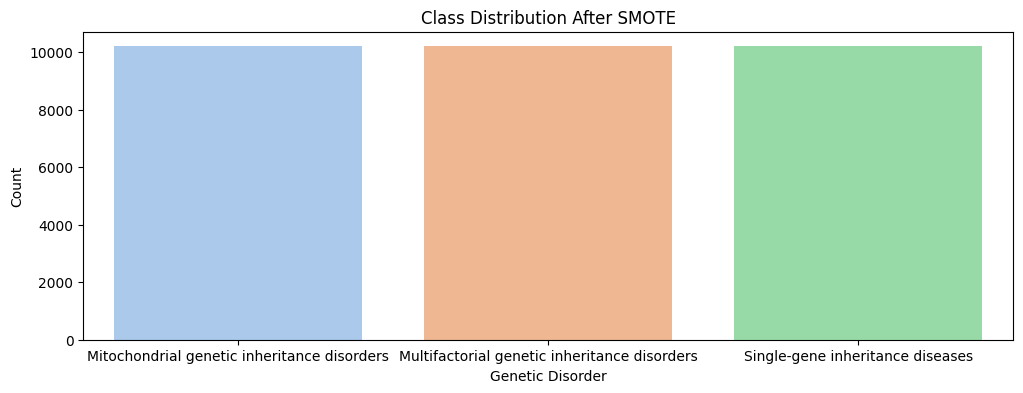

In [ ]:
# Plot the balanced class distribution
plt.figure(figsize=(12, 4))
sns.countplot(x='Genetic_Disorder', data=y_train_res_df, palette='pastel')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Genetic Disorder')
plt.ylabel('Count')
plt.show()


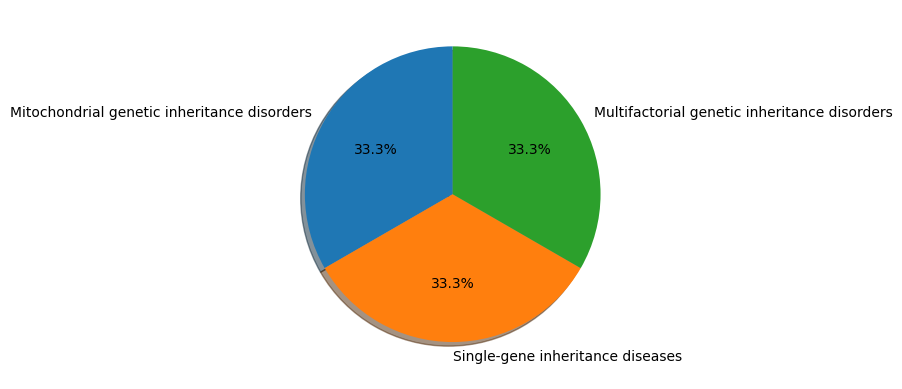

In [ ]:
labels_disorder = 'Mitochondrial genetic inheritance disorders', 'Single-gene inheritance diseases', 'Multifactorial genetic inheritance disorders'
explode_disorder = (0, 0, 0)


plt.pie(y_train_res_df.Genetic_Disorder.value_counts(), explode=explode_disorder, labels=labels_disorder, autopct='%1.1f%%',
        shadow=True, startangle=90);

In [ ]:
X_train_res.columns
#remove disorder subclass

Index(['Patient_Age', 'Genes_Mothers_Side', 'Inherited_Father',
       'Maternal_gene', 'Paternal_gene', 'Blood_Cell_mcL', 'Mothers_age',
       'Fathers_age', 'Status', 'Respiratory_Rate_breaths_min',
       'Heart_Rates_Min', 'Parental_consent', 'Follow_up', 'Gender',
       'Birth_asphyxia', 'Autopsy_Birth_Defect', 'Folic_Acid',
       'Maternal_Illness', 'Radiation_Exposure', 'Substance_Abuse',
       'Assisted_Conception', 'History_Previous_Pregnancies',
       'Previous_Abortion', 'Birth_Defects', 'White_Blood_Cell',
       'Blood_test_result', 'Disorder_Subclass'],
      dtype='object')

In [ ]:
X_train_res_2 = X_train_res

In [ ]:
# Assuming y_train_res is the resampled target variable from SMOTE
X_train_res_2['Genetic_Disorder'] = y_train_res.values

In [ ]:
X_train_res_df = pd.DataFrame(X_train_res_2, columns=['Patient_Age', 'Genes_Mothers_Side', 'Inherited_Father',
       'Maternal_gene', 'Paternal_gene', 'Blood_Cell_mcL', 'Mothers_age',
       'Fathers_age', 'Status', 'Respiratory_Rate_breaths_min',
       'Heart_Rates_Min', 'Parental_consent', 'Follow_up', 'Gender',
       'Birth_asphyxia', 'Autopsy_Birth_Defect', 'Folic_Acid',
       'Maternal_Illness', 'Radiation_Exposure', 'Substance_Abuse',
       'Assisted_Conception', 'History_Previous_Pregnancies',
       'Previous_Abortion', 'Birth_Defects', 'White_Blood_Cell',
       'Blood_test_result', 'Disorder_Subclass', 'Genetic_Disorder'])

In [ ]:
# Define a mapping dictionary
disorder_mapping = {
    0: 'Mitochondrial genetic inheritance disorders',
    1: 'Multifactorial genetic inheritance disorders',
    2: 'Single-gene inheritance diseases'
}

# Map the numeric values to disorder names
X_train_res_df['Genetic_Disorder'] = X_train_res_df['Genetic_Disorder'].replace(disorder_mapping)

NameError: name 'X_train_res_df' is not defined

Encoding mapping for 'Genes_Mothers_Side':
  0: Yes
  1: No


Encoding mapping for 'Inherited_Father':
  0: No
  1: Yes


Encoding mapping for 'Maternal_gene':
  0: Yes
  1: No


Encoding mapping for 'Paternal_gene':
  0: No
  1: Yes


Encoding mapping for 'Gender':
  0: Ambiguous
  1: Male
  2: Female


Encoding mapping for 'Birth_asphyxia':
  0: Yes
  1: No record
  2: Not available
  3: No


Encoding mapping for 'Autopsy_Birth_Defect':
  0: Not applicable
  1: No
  2: Yes


Encoding mapping for 'Folic_Acid':
  0: No
  1: Yes


Encoding mapping for 'Maternal_Illness':
  0: No
  1: Yes


Encoding mapping for 'Radiation_Exposure':
  0: No
  1: Yes
  2: -
  3: Not applicable


Encoding mapping for 'Substance_Abuse':
  0: No
  1: Not applicable
  2: -
  3: Yes


Encoding mapping for 'Assisted_Conception':
  0: No
  1: Yes


Encoding mapping for 'Birth_Defects':
  0: Multiple
  1: Singular


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns for plotting
cols = [
    'Genes_Mothers_Side', 'Inherited_Father', 'Maternal_gene', 'Paternal_gene', 
    'Gender', 'Birth_asphyxia', 'Autopsy_Birth_Defect', 
    'Folic_Acid', 'Maternal_Illness',
    'Radiation_Exposure', 'Substance_Abuse', 
    'Assisted_Conception', 'Birth_Defects'
]

# Create subplots
fig, ax = plt.subplots(len(cols), figsize=(15, 45), constrained_layout=True)

# Plot each categorical column with hue as 'Genetic_Disorder'
for i, var in enumerate(cols): 
    sns.countplot(data=X_train_res_df, x=var, hue='Genetic_Disorder', ax=ax[i], linewidth=1.5)
    ax[i].set_ylabel(var)
    ax[i].set_xlabel(None)

# Show the plots
plt.show()


# Implementing Models


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from imblearn.over_sampling import ADASYN

def run_modeling(encoded_filepath):
    # Load encoded data
    train_data = pd.read_csv(encoded_filepath)
    
    # Define features and target
    X = train_data.drop(['Genetic_Disorder','Disorder_Subclass'], axis=1)
    y = train_data['Genetic_Disorder']
   

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Define base classifiers
    base_classifiers = [
        ('rf', RandomForestClassifier(random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42)),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
        ('svc', SVC(probability=True, random_state=42))
    ]
    
    # Define the meta-classifier
    meta_classifier = LogisticRegression(max_iter=1000, random_state=42)
    
    # Create the stacking classifier
    stacking_classifier = StackingClassifier(
        estimators=base_classifiers,
        final_estimator=meta_classifier,
        cv=5,
        n_jobs=-1
    )
    
    # Train the stacking classifier
    stacking_classifier.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = stacking_classifier.predict(X_test)
    
    # Define the mapping dictionary for target names
    disorder_mapping = {
        0: 'Mitochondrial genetic inheritance disorders',
        1: 'Multifactorial genetic inheritance disorders',
        2: 'Single-gene inheritance diseases'
    }
    
    # Evaluate the model
    print("=== Model Evaluation Before SMOTE ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=[
        disorder_mapping[0], disorder_mapping[1], disorder_mapping[2]
    ]))
    
    # Apply SMOTE for balancing the training data
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
    
    # Display class distribution after SMOTE
    print("\nClass distribution before SMOTE:\n", y_train.value_counts())
    print("Class distribution after SMOTE:\n", y_train_res.value_counts())
    
    # Retrain the stacking classifier on balanced data
    stacking_classifier.fit(X_train_res, y_train_res)
    
    # Make predictions on the test set
    y_pred_res = stacking_classifier.predict(X_test)
    
    # Evaluate the model after SMOTE
    print("\n=== Model Evaluation After SMOTE ===")
    print("Accuracy:", accuracy_score(y_test, y_pred_res))
    print(classification_report(y_test, y_pred_res, target_names=[
        disorder_mapping[0], disorder_mapping[1], disorder_mapping[2]
    ]))
    
    # Optionally, save the trained model
    # import joblib
    # joblib.dump(stacking_classifier, 'stacking_classifier.pkl')
    # ========== Apply ADASYN to the Training Data ==========
    adasyn = ADASYN(random_state=42)
    X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

    # Verify the new class distribution after ADASYN
    print("\nClass distribution after ADASYN:")
    print(pd.Series(y_train_adasyn).value_counts())

    # ========== Model Evaluation After ADASYN ==========
    print("\n=== Model Evaluation After ADASYN ===")
    # Retrain the model on the ADASYN-resampled data

    stacking_classifier.fit(X_train_adasyn, y_train_adasyn)
    y_pred_adasyn = stacking_classifier.predict(X_test)

    # Calculate and print evaluation metrics for the ADASYN-trained model
    print("Accuracy:", accuracy_score(y_test, y_pred_adasyn))
    print(classification_report(y_test, y_pred_adasyn, target_names=[
            disorder_mapping[0], disorder_mapping[1], disorder_mapping[2]
        ]))

    return stacking_classifier

# Example usage
if __name__ == "__main__":
    run_modeling('encoded_data.csv')


=== Model Evaluation Before SMOTE ===
Accuracy: 0.5110330992978936
                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.51      1.00      0.68      2041
Multifactorial genetic inheritance disorders       0.00      0.00      0.00       414
            Single-gene inheritance diseases       0.00      0.00      0.00      1533

                                    accuracy                           0.51      3988
                                   macro avg       0.17      0.33      0.23      3988
                                weighted avg       0.26      0.51      0.35      3988



c:\Users\Sarat\miniforge3\envs\group11env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sarat\miniforge3\envs\group11env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sarat\miniforge3\envs\group11env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le


Class distribution before SMOTE:
 Genetic_Disorder
0    8161
2    6131
1    1657
Name: count, dtype: int64
Class distribution after SMOTE:
 Genetic_Disorder
0    8161
2    8161
1    8161
Name: count, dtype: int64

=== Model Evaluation After SMOTE ===
Accuracy: 0.46263791374122365
                                              precision    recall  f1-score   support

 Mitochondrial genetic inheritance disorders       0.52      0.70      0.59      2041
Multifactorial genetic inheritance disorders       0.17      0.06      0.09       414
            Single-gene inheritance diseases       0.37      0.26      0.30      1533

                                    accuracy                           0.46      3988
                                   macro avg       0.35      0.34      0.33      3988
                                weighted avg       0.42      0.46      0.43      3988


Class distribution after ADASYN:
Genetic_Disorder
0    8161
1    8069
2    6685
Name: count, dtype: int64

=== M

Implementing the Optimized stacked model - paper 

In [14]:
# Import required libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings('ignore')

# Load and preprocess data (example setup; adjust column names as needed)
data = pd.read_csv('encoded_data.csv')
X = data.drop(columns=['Genetic_Disorder', 'Disorder_Subclass'])  # Adjust as per dataset
y = data['Genetic_Disorder']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define base classifiers
base_classifiers = [
    ('svc', SVC(kernel='linear', probability=True, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('etc', ExtraTreesClassifier(n_estimators=100, random_state=42))
]

# Define meta-classifier
meta_classifier = LogisticRegression()

# Create the stacking classifier
stacking_model = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=meta_classifier,
    cv=5
)

# Train the stacking model
stacking_model.fit(X_train_res, y_train_res)

# Make predictions and evaluate
y_pred = stacking_model.predict(X_test)
y_pred_proba = stacking_model.predict_proba(X_test)

# Calculate accuracy, classification report, and AUC scores
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate ROC AUC for each class if multi-class
if len(y.unique()) > 2:
    auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
else:
    auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])

print("ROC AUC Score:", auc_score)


Accuracy: 0.4593781344032096
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.66      0.58      2041
           1       0.17      0.06      0.08       414
           2       0.37      0.30      0.33      1533

    accuracy                           0.46      3988
   macro avg       0.35      0.34      0.33      3988
weighted avg       0.42      0.46      0.43      3988

ROC AUC Score: 0.5131882669626385


Implementing the Chain classifier paper 

In [ ]:

# Load and preprocess data (example setup; adjust column names as needed)
data = pd.read_csv('encoded_data.csv')
X = data.drop(columns=['Genetic_Disorder', 'Disorder_Subclass'])  # Adjust as per dataset
y = data['Genetic_Disorder']

# Preprocessing: Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a chain classifier (multi-output classifier)
model = MultiOutputClassifier(RandomForestClassifier(n_estimators=100))
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
# Evaluate individual classifiers and compare with stacking model

# Dictionary to store results
results = {}

# Loop through each base classifier
for name, model in base_classifiers:
    # Train the individual model
    model.fit(X_train_res, y_train_res)
    
    # Predict on the test set
    y_pred_individual = model.predict(X_test)
    y_pred_proba_individual = model.predict_proba(X_test)
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred_individual)
    class_report = classification_report(y_test, y_pred_individual, zero_division=0)
    if len(y.unique()) > 2:
        auc_score = roc_auc_score(y_test, y_pred_proba_individual, multi_class='ovr')
    else:
        auc_score = roc_auc_score(y_test, y_pred_proba_individual[:, 1])
    
    # Store results
    results[name] = {
        'Accuracy': acc,
        'Classification Report': class_report,
        'ROC AUC Score': auc_score
    }

    # Print results for the individual model
    print(f"Results for {name}:")
    print(f"Accuracy: {acc}")
    print("Classification Report:")
    print(class_report)
    print(f"ROC AUC Score: {auc_score}")
    print("-" * 50)

# Compare with Stacking Model
print("Evaluating Stacking Model:")
y_pred_stacking = stacking_model.predict(X_test)
y_pred_proba_stacking = stacking_model.predict_proba(X_test)
stacking_acc = accuracy_score(y_test, y_pred_stacking)
stacking_class_report = classification_report(y_test, y_pred_stacking, zero_division=0)
if len(y.unique()) > 2:
    stacking_auc_score = roc_auc_score(y_test, y_pred_proba_stacking, multi_class='ovr')
else:
    stacking_auc_score = roc_auc_score(y_test, y_pred_proba_stacking[:, 1])

print("Stacking Model Results:")
print(f"Accuracy: {stacking_acc}")
print("Classification Report:")
print(stacking_class_report)
print(f"ROC AUC Score: {stacking_auc_score}")
print("-" * 50)

# Add Stacking Model results to the dictionary
results['stacking_model'] = {
    'Accuracy': stacking_acc,
    'Classification Report': stacking_class_report,
    'ROC AUC Score': stacking_auc_score
}

# Optional: Save results to a file for further analysis
import json
with open('classifier_results.json', 'w') as f:
    json.dump(results, f, indent=4)


In [34]:
X_train_res

NameError: name 'X_train_res' is not defined